<a href="https://colab.research.google.com/github/Bk073/car-price-prediction/blob/master/linear_reg_fuse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Matplotlib.pyplot
[docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)

In [44]:
car_data = pd.read_csv('drive/My Drive/fuse.ai/data/CarPrice.csv')
car_data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [0]:
del car_data['car_ID']

In [46]:
car_data.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [47]:
car_data.shape

(205, 25)

In [48]:
car_data.info()
# no null values
# some objects are present that needs to be encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [0]:
def num_missing(x):
  return sum(x.isnull())

In [50]:
# Finding missing value per column:
print("Missing value per column:")
print(car_data.apply(num_missing, axis=0))

# Finding missing value per row
print("Missing value per individual row:")
print(car_data.apply(num_missing, axis=1))

Missing value per column:
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
Missing value per individual row:
0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Length: 205, dtype: int64


In [51]:
car_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [52]:
# Split brand or company from CarName

CompanyName = car_data['CarName'].apply(lambda x : x.split(' ')[0])
car_data.insert(1, "CompanyName", CompanyName)
del car_data['CarName']
car_data.head(10)

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [53]:
car_data['CompanyName'].values

array(['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi',
       'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw',
       'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet',
       'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge',
       'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'isuzu', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar',
       'jaguar', 'maxda', 'maxda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick',
       'buick', 'buick', 'buick', 'buick', 'buick', 'mercury',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'Nissan', 'nissan

In [54]:
car_data['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [0]:
car_data['CompanyName'] = car_data['CompanyName'].str.lower()

In [0]:
car_data['CompanyName'].replace(('vw', 'vokswagen'), 'volkswagen', inplace=True)

In [0]:
car_data['CompanyName'].replace('maxda', 'mazda', inplace=True)

In [0]:
car_data['CompanyName'].replace('toyouta', 'toyota', inplace=True)

In [0]:
def replace_name(a,b, columnName):
  car_data[columnName].replace(a, b, inplace=True)

In [0]:
replace_name(('vw', 'vokswagen'), 'volkswagen', 'CompanyName')

In [0]:
?plt.scatter(car_data)

In [0]:
import seaborn as sns

[]

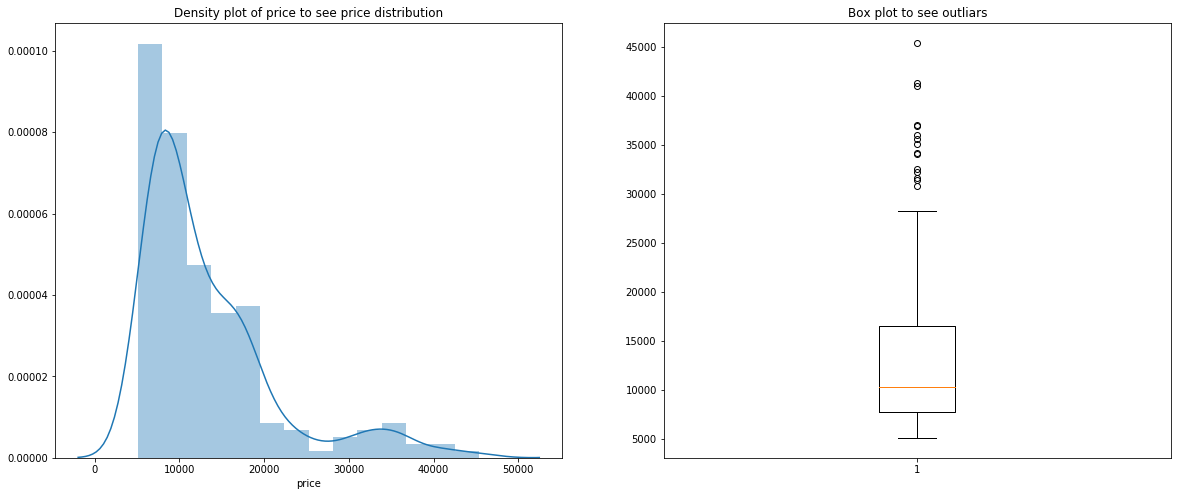

In [63]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.title('Density plot of price to see price distribution')
sns.distplot(car_data['price'])

plt.subplot(1, 2, 2)
plt.title('Box plot to see outliars')
plt.boxplot(car_data['price'])
plt.plot() # this removes the description

**Inference from above plot**
- The price is right skewed i.e most price is below 1500 from box plot
- There is high variance from mean.

**Univariate(i.e car price only) plot so we are using density plot and box plot**

Bivariate ->  scatter plot,  

**Lets observe the effect of categorical features with the price**

## Scatter plot( to measure correlation)
[scatter plot](https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf)

- scatter plot best fits for numerical features, here in below figure the CompanyName is categorical variable so we couldn't get intitution

[]

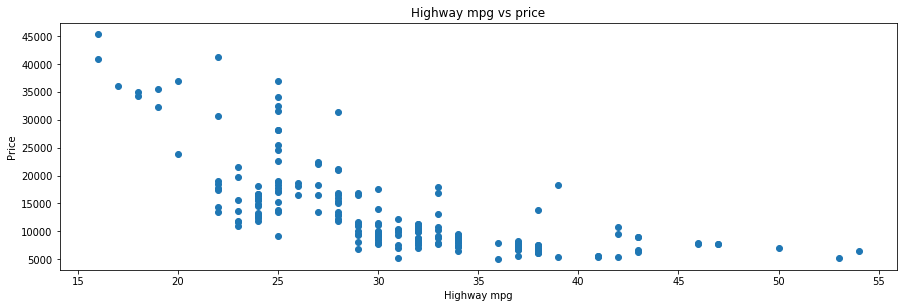

In [64]:
plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.scatter(car_data['CompanyName'], car_data['price'],)
plt.xlabel('Company Name')
plt.ylabel('Car price')
plt.xticks(rotation=90)
plt.title('car price vs Company name')

plt.subplot(1, 2, 2)
plt.scatter(car_data['doornumber'], car_data['price'])
plt.xlabel('Door number')
plt.ylabel('Price')
plt.title('door number vs price')
# plt.savefig('../home/scatt.png', )

plt.subplot(2, 1, 1)
plt.scatter(car_data['highwaympg'], car_data['price'])
plt.xlabel('Highway mpg')
plt.ylabel('Price')
plt.title('Highway mpg vs price')
plt.plot()


In [0]:
car_data.drop(labels='doornumber', axis=1, inplace=True)

In [66]:
car_data.head()


,symboling,CompanyName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [0]:
car_data.drop(axis=1, columns=['symboling', 'CompanyName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'cylindernumber', 'fuelsystem'], inplace=True)

In [68]:
car_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,dohc,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,dohc,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,ohcv,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,ohc,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,ohc,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [0]:
car_data.drop(axis=1, columns='enginetype', inplace=True)

In [0]:
def normalize(x):
  return (x - x.min())/(x.max() - x.min())

In [0]:
car_data['wheelbase']  = normalize(car_data['wheelbase'])

In [72]:
# car_data['carheight'] = car_data['carheight'].apply(lambda x: (x - x.min())/(x.max() - x.min()))
car_data['carheight'] = normalize(car_data['carheight'])
car_data['carlength'] = normalize(car_data['carlength'])
car_data['carwidth'] = normalize(car_data['carwidth'])
car_data['curbweight'] = normalize(car_data['curbweight'])
car_data['enginesize'] = normalize(car_data['enginesize'])
car_data['boreratio'] = normalize(car_data['boreratio'])
car_data['stroke'] = normalize(car_data['stroke'])
car_data['compressionratio'] = normalize(car_data['compressionratio'])
car_data['horsepower'] = normalize(car_data['horsepower'])
car_data['peakrpm'] = normalize(car_data['peakrpm'])
car_data['citympg'] = normalize(car_data['citympg'])
car_data['highwaympg'] = normalize(car_data['highwaympg'])
car_data['price'] = normalize(car_data['price'])
car_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [73]:
car_data.shape

(205, 14)

In [74]:
y = car_data.loc[:, ['price']]
y.head()

,price
0,0.207959
1,0.282558
2,0.282558
3,0.219254
4,0.306142


In [75]:
x = car_data.loc[:, 'wheelbase':'highwaympg']
x.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.10)

In [78]:
x_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
56,0.253644,0.416418,0.450000,0.150000,0.346005,0.033962,0.564286,0.564286,0.1500,0.220833,0.755102,0.111111,0.184211
166,0.230321,0.411940,0.308333,0.400000,0.314973,0.139623,0.500000,0.480952,0.1500,0.266667,1.000000,0.361111,0.342105
95,0.230321,0.365672,0.291667,0.458333,0.209465,0.135849,0.435714,0.580952,0.1500,0.087500,0.428571,0.500000,0.552632
75,0.469388,0.556716,0.641667,0.583333,0.551590,0.298113,0.885714,0.500000,0.0625,0.529167,0.346939,0.166667,0.210526
111,0.620991,0.680597,0.675000,0.741667,0.615593,0.222642,0.657143,0.057143,0.0875,0.195833,0.346939,0.166667,0.210526


In [155]:
x_train.shape

(184, 13)

In [153]:
y_train.shape

(184, 1)

In [0]:
def cost_function(x, y, w, b):
  return (1/(2 * len(y)))*(np.sum((np.dot(x, w) + b - y)**2))

In [0]:
def gradient(x, y, w, b, learning_rate, iterations):
  n_samples = len(y)
  loss = np.zeros((iterations, 1))
  for i in range(iterations):
    w = w - ((learning_rate/n_samples) * np.sum( np.dot(x.T, (y - np.dot(x, w) + b))))
    loss[i] = cost_function(x, y, w, b)
    b = b - ((learning_rate/n_samples) * np.sum(y - np.dot(x, w) + b))
    # b = b

  return (loss, w, b)

In [0]:
def predict(x, w, b):
  return np.dot(x, w) + b

In [0]:
def model(x_train, y_train, x_test, y_test, num_iteration=1500, learning_rate=0.01):
  B = np.zeros(shape=(x_train.shape[1], 1))
  b = 0
  loss, w, b = gradient(x=x_train, y=y_train, w=B, b=b,learning_rate=learning_rate, iterations=num_iteration)

  y_prediction_train = predict(x_train, w, b)
  y_prediction_test = predict(x_test, w, b)

  y_train = y_train.values.reshape(y_train.shape[0], 1)
  y_test = y_test.values.reshape(y_test.shape[0], 1)

  print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
  


In [173]:
model = model(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, num_iteration = 500, learning_rate = 0.01)

ValueError: ignored